In [1]:
import process_chile_gdp_data as pcd

df = pcd.process_data_for_synth()
df.head()

,year,region_name,gdp_cap,population,ed_superior,ed_superior_cap,agropecuario,pesca,mineria,industria_m,electricidad,construccion,comercio,transporte,servicios_financieros,vivienda,personales,publica,id,growth_rate
0,1985,I De Tarapacá,2212588.545,NaN,NaN,NaN,0.009879,0.109209,0.057236,0.153727,0.017591,0.058760,0.090434,0.085300,0.041656,0.067401,0.123343,0.125412,1.0,NaN
1,1986,I De Tarapacá,2273234.037,NaN,NaN,NaN,0.009903,0.127265,0.060959,0.145300,0.017266,0.069915,0.087143,0.088118,0.042979,0.065055,0.119930,0.121847,1.0,NaN
2,1987,I De Tarapacá,2268484.676,NaN,NaN,NaN,0.009903,0.083250,0.047446,0.145348,0.018077,0.095254,0.100225,0.087799,0.047529,0.064671,0.119737,0.120035,1.0,NaN
3,1988,I De Tarapacá,2275506.186,NaN,NaN,NaN,0.010086,0.072526,0.051224,0.151336,0.016154,0.084226,0.102094,0.086618,0.051466,0.064217,0.118528,0.126855,1.0,NaN
4,1989,I De Tarapacá,2446640.978,NaN,NaN,NaN,0.009318,0.088220,0.062924,0.146503,0.015185,0.054298,0.108763,0.096535,0.054859,0.059684,0.109518,0.116224,1.0,NaN


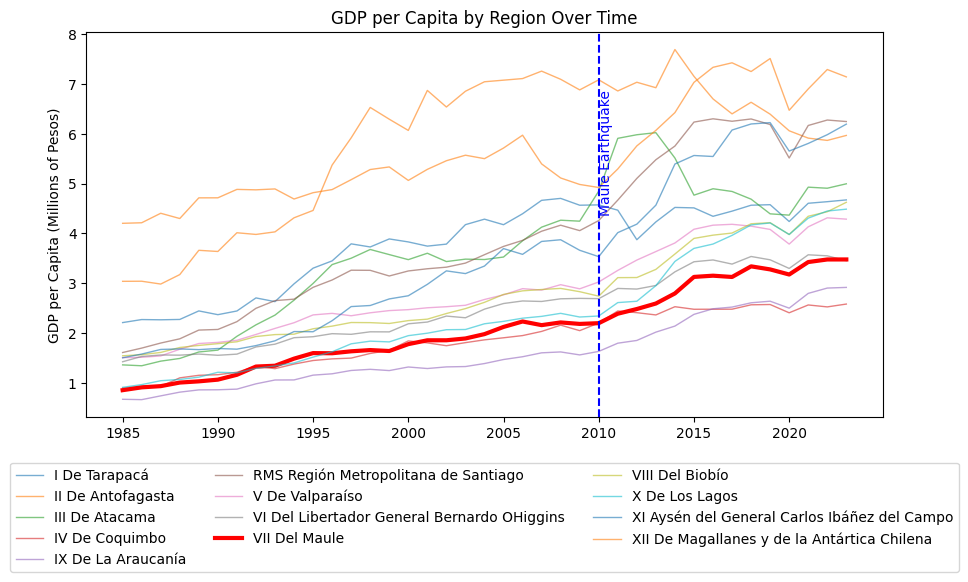

In [10]:
#tools.display_dataframe_to_user(name="Extended GDP per Capita Data", dataframe=merged_df)
import matplotlib.pyplot as plt

gdp_per_capita = df.pivot(index='year', columns='region_name', values='gdp_cap')
# Plot each region's GDP per capita over time with prominence to VII Del Maule and the requested modifications
plt.figure(figsize=(10, 6))
for region in gdp_per_capita.columns:
    if region == 'VII Del Maule':
        plt.plot(gdp_per_capita.index, gdp_per_capita[region]/1000000, label=region, linewidth=3, color='red')
    else:
        plt.plot(gdp_per_capita.index, gdp_per_capita[region]/1000000, label=region, linewidth=1, alpha=0.6)

# Add a vertical line at 2010 with an annotation for the earthquake
plt.axvline(x=2010, color='blue', linestyle='--')
plt.text(2010, plt.ylim()[1]*0.7, 'Maule Earthquake', rotation=90, verticalalignment='center', color='blue')

plt.ylabel('GDP per Capita (Millions of Pesos)')
plt.title('GDP per Capita by Region Over Time')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.show()


In [3]:
import sys
sys.path.insert(0, '../src')
import nz_util

nz = nz_util.clean_data_for_synthetic_control()
nz.to_csv('../inter/nz.csv', index=False)

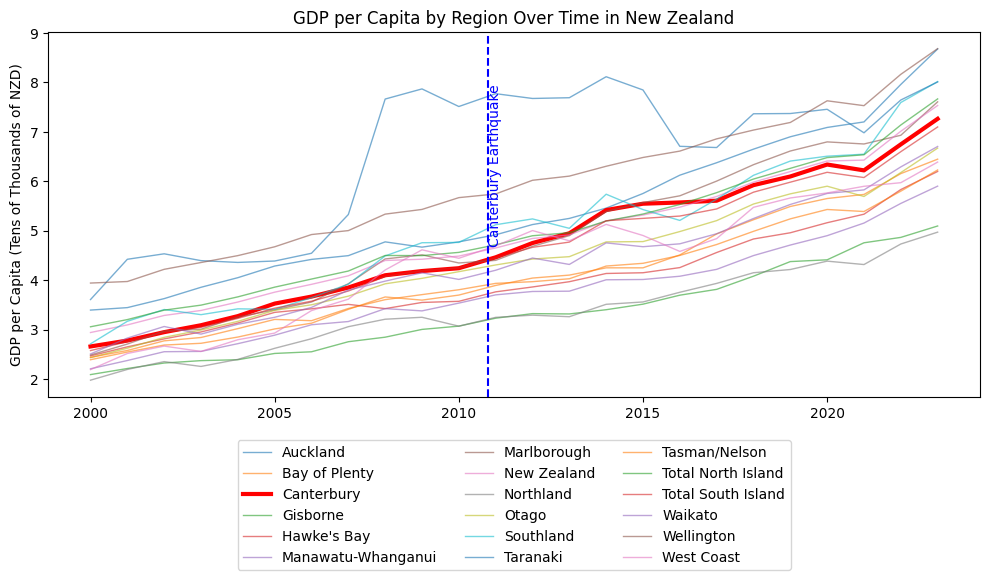

In [11]:

# Pivot the data to have years as index and regions as columns for GDP per capita
nz_gdp_per_capita = nz.pivot(index='Year', columns='Region', values='GDP per capita')

# Plot each region's GDP per capita over time with prominence to Canterbury
plt.figure(figsize=(10, 6))
for region in nz_gdp_per_capita.columns:
    if region == 'Canterbury':
        plt.plot(nz_gdp_per_capita.index, nz_gdp_per_capita[region]/10000, label=region, linewidth=3, color='red')
    else:
        plt.plot(nz_gdp_per_capita.index, nz_gdp_per_capita[region]/10000, label=region, linewidth=1, alpha=0.6)

# Add a vertical line at 2010.8 with an annotation for the Canterbury Earthquake
plt.axvline(x=2010.8, color='blue', linestyle='--')
plt.text(2010.8, plt.ylim()[1]*0.7, 'Canterbury Earthquake', rotation=90, verticalalignment='center', color='blue')

plt.ylabel('GDP per Capita (Tens of Thousands of NZD)')
plt.title('GDP per Capita by Region Over Time in New Zealand')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.show()


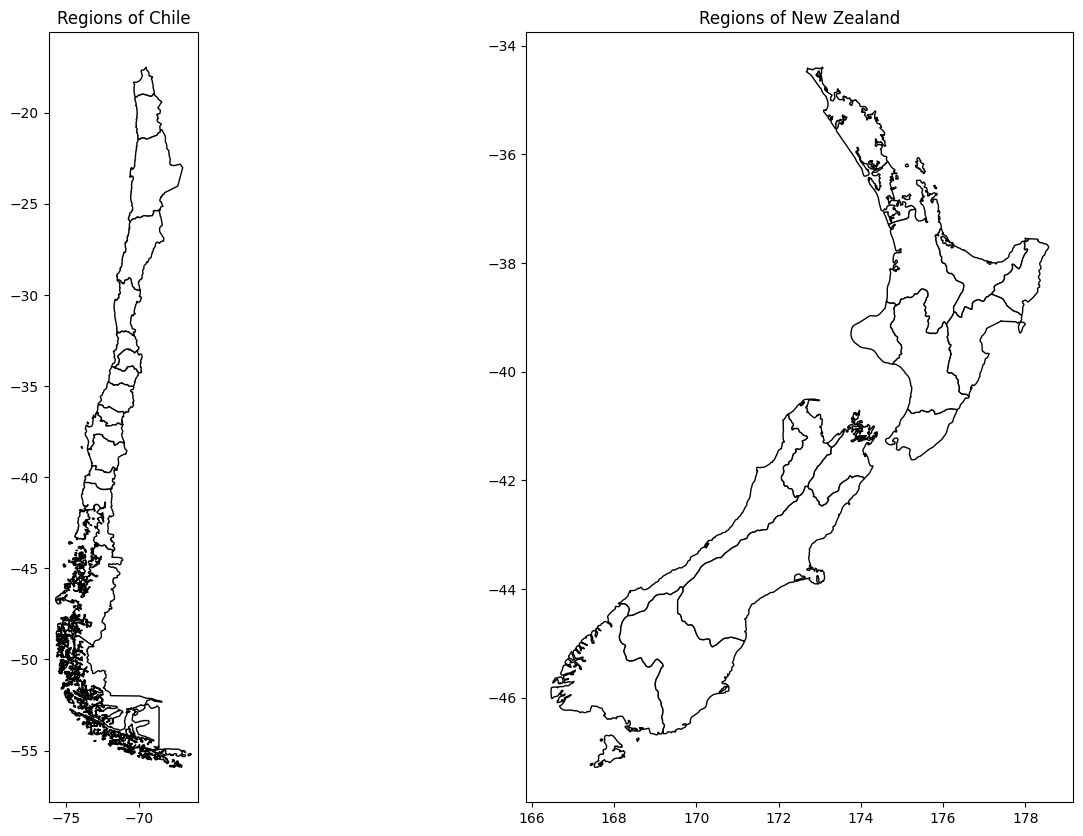

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefiles for Chile and New Zealand
chile_shapefile = gpd.read_file('../data/cl_shp/cl.shp')
nz_shapefile = gpd.read_file('../data/nz_shp/nz.shp') 

# Plot the maps
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

# Plot Chile
chile_shapefile.plot(ax=ax[0], color='white', edgecolor='black')
ax[0].set_title('Regions of Chile')

# Plot New Zealand
nz_shapefile.plot(ax=ax[1], color='white', edgecolor='black')
ax[1].set_title('Regions of New Zealand')

plt.show()


In [3]:
chile_shapefile

,id,name,source,geometry,color
0,CLAP,Arica y Parinacota,https://simplemaps.com,"POLYGON ((-68.98961 -18.94649, -68.99043 -18.9...",gray
1,CLTA,TarapacÃ¡,https://simplemaps.com,"POLYGON ((-70.27033 -19.17148, -70.26956 -19.1...",gray
2,CLAN,Antofagasta,https://simplemaps.com,"POLYGON ((-70.06135 -21.44834, -70.05853 -21.4...",gray
3,CLAT,Atacama,https://simplemaps.com,"POLYGON ((-70.63464 -26.02863, -70.63455 -26.0...",gray
4,CLCO,Coquimbo,https://simplemaps.com,"POLYGON ((-71.48712 -29.21134, -71.48697 -29.2...",gray
5,CLRM,RegiÃ³n Metropolitana de Santiago,https://simplemaps.com,"POLYGON ((-70.10610 -33.05259, -70.10528 -33.0...",gray
6,CLVS,ValparaÃ­so,https://simplemaps.com,"POLYGON ((-70.33082 -32.20959, -70.32725 -32.2...",gray
7,CLML,Maule,https://simplemaps.com,"POLYGON ((-70.37245 -35.02739, -70.36852 -35.0...",gray
8,CLLI,Libertador General Bernardo O'Higgins,https://simplemaps.com,"POLYGON ((-70.04818 -34.28346, -70.05758 -34.2...",gray
9,CLNB,Ãuble,https://simplemaps.com,"POLYGON ((-72.79914 -36.05310, -72.79501 -36.0...",gray


TypeError: plot_regions() got an unexpected keyword argument 'axis'

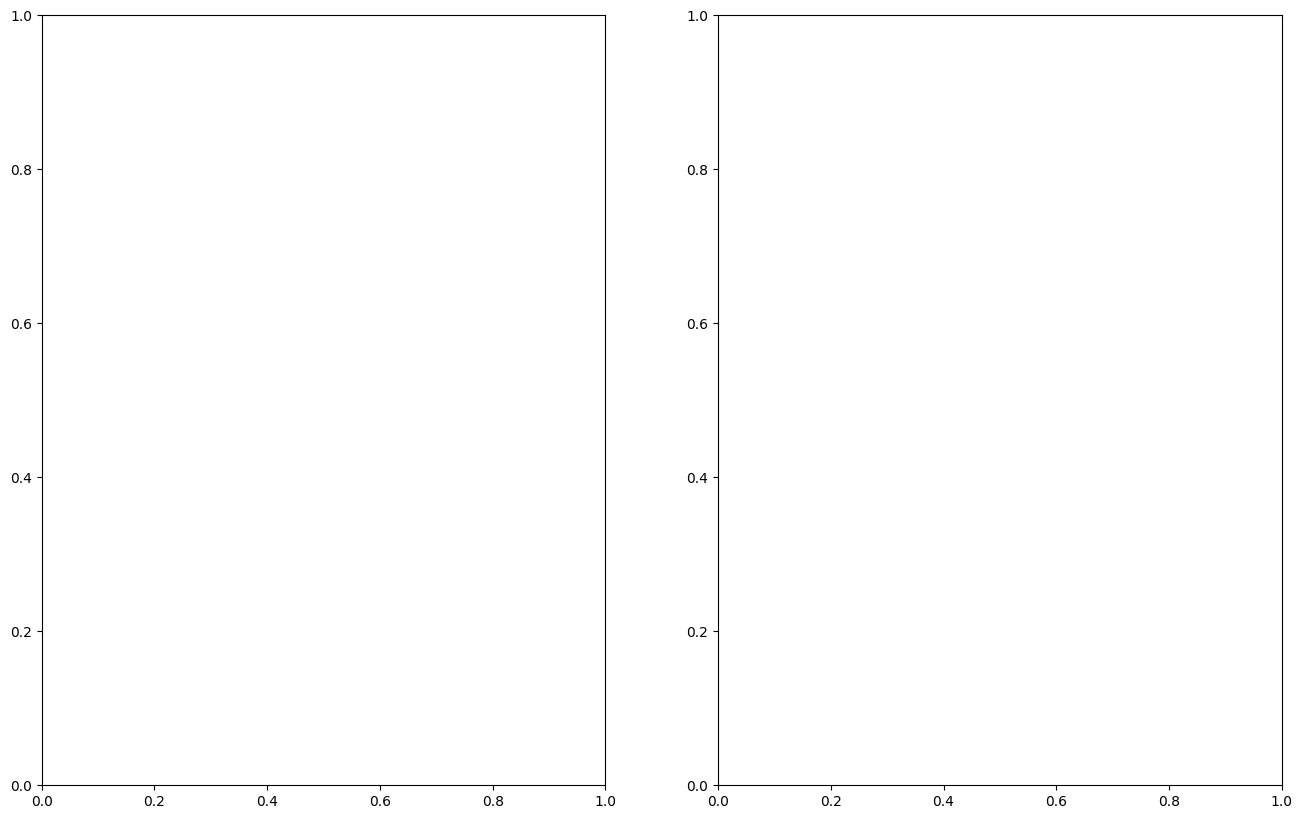

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

chile_shapefile = gpd.read_file('../data/cl_shp/cl.shp')
nz_shapefile = gpd.read_file('../data/nz_shp/nz.shp') 

# Define a function to plot the maps with different colors for regions and highlight the earthquake region
def plot_regions(ax, gdf, earthquake_region, title):
    # Assign a color to each region
    gdf['color'] = 'gray'
    gdf.loc[gdf['name'] == earthquake_region, 'color'] = 'crimson'
    
    # Plot the regions
    gdf.plot(ax=ax, color=gdf['color'], edgecolor='black', legend=True, axis_on=False)
    ax.set_title(title)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

# Plot Chile with the earthquake region highlighted in red
plot_regions(ax[0], chile_shapefile, earthquake_region='Maule', title='Regions of Chile (Maule highlighted)')

# Plot New Zealand with the earthquake region highlighted in red
plot_regions(ax[1], nz_shapefile, earthquake_region='Canterbury', title='Regions of New Zealand (Canterbury highlighted)')

# Add legends
#handles, labels = ax[0].get_legend_handles_labels()
#ax[0].legend(handles, labels, loc='lower left', title='Regions')

#handles, labels = ax[1].get_legend_handles_labels()
#ax[1].legend(handles, labels, loc='lower left', title='Regions')

plt.tight_layout()
plt.show()
